# Manipuler des données géographiques

Encore à faire (Matthias?) :

- Travailler sur la visualisation de l'Europe pour montrer un peu comment placer des choses sur une carte, labels, etc. Si tu as envie de montrer la manière de faire une visualisation plus aboutie, ou illustrer certaines features de Pandas, feel free, sinon je complèterai jeudi matin
- Mettre un exemple de chargement d'une carte sous format raster et essayer de placer des éléments dessus (un peu de manipulation de matplotlib pour montrer que c'est possible de faire des choses ... J'ai mis une carte dans Data : large-detailed-old-map-of-europe-1851
- Routiniser le script pour savoir dans quel pays européen est une coordonnée GPS comme on avait parlé pour faire un truc sous ligne de commande
- Autre / complexification si tu as des idées pour compléter.

## Petit point général [Émilien]

- Ce qu'est une donnée géographique
- ce qu'est un GIS (des géographes dans la salle?)
- ce qu'est une carte : d'une image à une visualisation de données
- plusieurs façon de construire une carte :
  - point par point
  - en manipulant des entités géographiques : polygones

## Les données disponibles

- Les données géographiques sont deux choses :
  - La description géographique d'entités (positions, frontières, etc.)
  - Des informations associées à ces éléments
- Il existe de plus en plus de données géographiques ouvertes, mais cela peut dépendre des pays
  - Par ex en France INSEE + IRIS + données du recensement
- La création des cartes et des entités géographiques larges est un métier à part entière
- Par exemple pour l'Europe :
  - https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/countries
- Il est possible de le faire aussi à la main de différentes manières
  - Dessiner en vectoriel une carte et la charger
  - construire point par point les polygones que l'on souhaite

## Une carte c'est d'abord une image

Text(1000, 1000, "De l'eau")

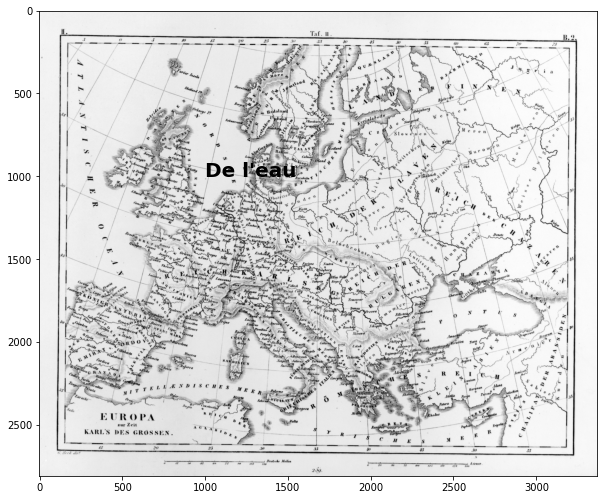

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

    
image = Image.open("Data/large-detailed-old-map-of-europe-1851.jpg")
#display(image)
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(image)
plt.annotate("De l'eau",(1000,1000), weight='bold',fontsize=20)

Ensuite, placer des points, etc.

## Présentation de GéoPandas

Étendre Pandas (tableaux) avec une colonne qui détermine une géométrie

- Géométrie : des poins, lignes ou polygones
- Pouvoir ensuite manipuler ces informations avec des propriétés géographiques : distances, etc.
- Le plus simple est de directement manipuler un fichier de données qui existe

Notons que pour un usage plus bas niveau, vous voudrez aller regarder des bibliothèques comme **Cartopy**.

In [1]:
from shapely.geometry import Point,Polygon,LineString

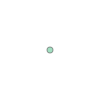

In [2]:
Point(10,10)

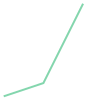

In [3]:
LineString([[1,2],[4,3],[7,9]])

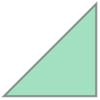

In [8]:
p = Polygon([[0,0],[3,0],[3,3]])
p

A partir de ça, on peut tout construire... et une carte est une composition de forme

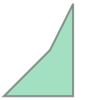

In [9]:
p2 = p.union(
    Polygon([[1,0],[3,0],[3,4]])
)
p2

## Manipuler une carte

  - https://data.opendatasoft.com/explore/dataset/european-union-countries@public/export/


In [18]:
import geopandas as gpd
fichier = "Data/europe/european-union-countries.shp"
ue = gpd.read_file(fichier)

In [19]:
ue

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
0,1.0,Admin-0 country,5.0,Cyprus,CYP,0.0,2.0,Sovereign country,Cyprus,CYP,...,Asia,Asia,Western Asia,Europe & Central Asia,6.0,6.0,4.0,-99.0,1.0,"MULTIPOLYGON (((33.77399 34.98867, 33.77792 34..."
1,0.0,Admin-0 country,2.0,France,FR1,1.0,2.0,Country,France,FRA,...,Europe,Europe,Western Europe,Europe & Central Asia,6.0,6.0,3.0,-99.0,1.0,"MULTIPOLYGON (((55.50131 -20.87322, 55.51401 -..."
2,0.0,Admin-0 country,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,Europe,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"MULTIPOLYGON (((23.27019 57.78563, 23.25025 57..."
3,0.0,Admin-0 country,4.0,Denmark,DN1,1.0,2.0,Country,Denmark,DNK,...,Europe,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"MULTIPOLYGON (((11.25603 54.95458, 11.30348 54..."
4,0.0,Admin-0 country,3.0,Finland,FI1,1.0,2.0,Country,Finland,FIN,...,Europe,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"MULTIPOLYGON (((22.44370 59.85147, 22.42774 59..."
5,0.0,Admin-0 country,6.0,Slovenia,SVN,0.0,2.0,Sovereign country,Slovenia,SVN,...,Europe,Europe,Southern Europe,Europe & Central Asia,8.0,8.0,4.0,-99.0,1.0,"POLYGON ((16.34343 46.71418, 16.35728 46.71583..."
6,0.0,Admin-0 country,5.0,Hungary,HUN,0.0,2.0,Sovereign country,Hungary,HUN,...,Europe,Europe,Eastern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"POLYGON ((20.98149 48.51686, 21.00650 48.51815..."
7,0.0,Admin-0 country,4.0,Bulgaria,BGR,0.0,2.0,Sovereign country,Bulgaria,BGR,...,Europe,Europe,Eastern Europe,Europe & Central Asia,8.0,8.0,5.0,-99.0,1.0,"POLYGON ((22.91956 43.83422, 23.13185 43.84794..."
8,5.0,Admin-0 country,5.0,Malta,MLT,0.0,2.0,Sovereign country,Malta,MLT,...,Europe,Europe,Southern Europe,Middle East & North Africa,5.0,5.0,5.0,3.0,1.0,"MULTIPOLYGON (((14.56715 35.84561, 14.56178 35..."
9,0.0,Admin-0 country,2.0,Belgium,BEL,0.0,2.0,Sovereign country,Belgium,BEL,...,Europe,Europe,Western Europe,Europe & Central Asia,7.0,7.0,5.0,-99.0,1.0,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ..."


Un fichier de données géographiques

In [20]:
ue.columns

Index(['scalerank', 'featurecla', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'woe_id_eh', 'woe_note',
       'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent',
       'region_un', 'subregion', 'region_wb', 'name_len', 'long_len',
       'abbrev_len', 'tiny', 'homepart', 'geometry'],
      dtype='object')

In [21]:
ue["geometry"]

0     MULTIPOLYGON (((33.77399 34.98867, 33.77792 34...
1     MULTIPOLYGON (((55.50131 -20.87322, 55.51401 -...
2     MULTIPOLYGON (((23.27019 57.78563, 23.25025 57...
3     MULTIPOLYGON (((11.25603 54.95458, 11.30348 54...
4     MULTIPOLYGON (((22.44370 59.85147, 22.42774 59...
5     POLYGON ((16.34343 46.71418, 16.35728 46.71583...
6     POLYGON ((20.98149 48.51686, 21.00650 48.51815...
7     POLYGON ((22.91956 43.83422, 23.13185 43.84794...
8     MULTIPOLYGON (((14.56715 35.84561, 14.56178 35...
9     POLYGON ((4.81545 51.43107, 4.82268 51.41368, ...
10    POLYGON ((14.39781 51.01311, 14.42582 51.02094...
11    MULTIPOLYGON (((-68.23729 12.02680, -68.24254 ...
12    MULTIPOLYGON (((24.13526 34.82176, 24.13526 34...
13    POLYGON ((19.70632 49.38753, 19.72658 49.38887...
14    MULTIPOLYGON (((-9.82409 51.63890, -9.81697 51...
15    POLYGON ((26.72238 48.25977, 26.73313 48.27075...
16    POLYGON ((25.33368 58.03181, 25.33988 58.03258...
17    POLYGON ((19.00213 54.34492, 19.37721 54.3

Un système de projection

In [22]:
ue.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Que l'on peut éventuellement changer

Des informations

In [23]:
ue["pop_est"]

0       531640.0
1     64057792.0
2      1299371.0
3      5500510.0
4      5250275.0
5      2005692.0
6      9905596.0
7      7204687.0
8       405165.0
9     10414336.0
10    10211904.0
11    16715999.0
12    10737428.0
13     5463046.0
14     4203200.0
15    22215421.0
16     2231503.0
17    38482919.0
18    58126212.0
19    82329758.0
20    40525002.0
21    62262000.0
22     3555179.0
23     4489409.0
24     9059651.0
25    10707924.0
26      491775.0
27     8210281.0
Name: pop_est, dtype: float64

In [24]:
europe = ue

<AxesSubplot:>

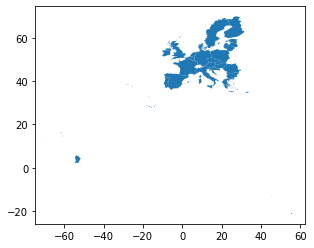

In [25]:
europe.plot()

<AxesSubplot:>

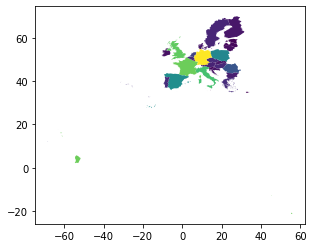

In [26]:
europe.plot(column="pop_est")

Possibilité de manipuler ce fichier

In [27]:
france = europe[europe["name"]=="France"]

<AxesSubplot:>

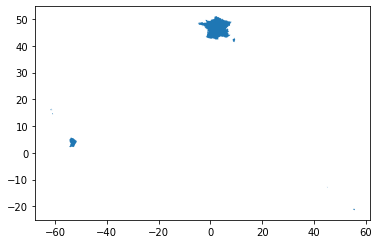

In [28]:
france.plot()

Enlever le Royaume-Uni ? Enlever la Réunion ?

Et maintenant, ajouter la suisse ?

- https://geodata.lib.berkeley.edu/catalog/stanford-jn788wp9910

In [30]:
fichier = "Data/suisse/CHE_adm1.shp"

suisse = gpd.read_file(fichier)

<AxesSubplot:>

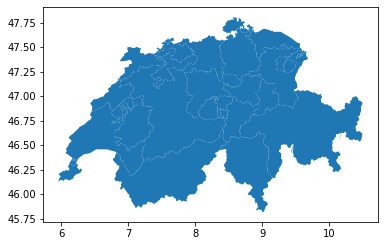

In [31]:
suisse.plot()

In [32]:
suisse.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
suisse_p = suisse.dissolve(by="NAME_0",aggfunc='first')

<AxesSubplot:>

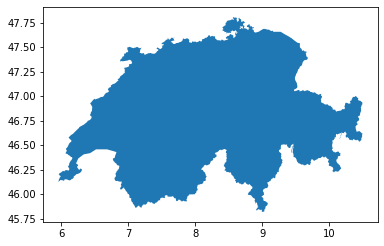

In [34]:
suisse_p.plot()

Ajouter la suisse à l'Union Européenne

In [84]:
europe.keys()

Index(['scalerank', 'featurecla', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'note_adm0', 'note_brk', 'name_sort', 'name_alt',
       'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est',
       'gdp_md_est', 'pop_year', 'lastcensus', 'gdp_year', 'economy',
       'income_grp', 'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3',
       'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'woe_id_eh', 'woe_note',
       'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent',
       'region_un', 'subregion', 'region_wb', 'name_len', 'long_len',
       'abbrev_len', 'tiny', 'homepart', 'geometry'],
      dtype='object')

In [112]:
suisse_p

,geometry,ID_0,ISO,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
NAME_0,,,,,,,,,,,,
Switzerland,"MULTIPOLYGON (((6.23123 46.30991, 6.23293 46.3...",223,CHE,1,Aargau,CH.AG,0,None,Canton|Kanton|Chantun,Canton,None,Argovia|Arg¢via|Argovie


In [101]:
europe_mod = europe[["name","geometry"]].set_index("name")

In [109]:
europe_mod = europe_mod.append(suisse_p[europe_mod.columns])

<AxesSubplot:>

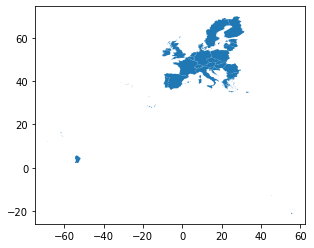

In [113]:
europe_mod.plot()

## Ajouter des informations [Matthias]

Maintenant qu'il est clair que c'est un jeu de données avec différentes informations, rien ne nous empêche de rajouter une colonne.

On peut par exemple s'interface avec Wikipédia pour récupérer une information, par ex. la longueur de la page wikipédia associée au pays

In [114]:
import wikipedia

In [115]:
wikipedia.search("France")

['France',
 'France national football team',
 'French cuisine',
 'French of France',
 'Coupe de France',
 'List of French monarchs',
 'French colonial empire',
 'Departments of France',
 'President of France',
 'Vichy France']

In [41]:
p = wikipedia.page("France")

In [42]:
len(p.content)

140219

Il suffit de faire une boucle

Petit retour sur les API : essayer aussi d'installer et utiliser `wptools`.

## Aller vers une carte plus complexe et la visualisation

- géolocaliser des élément à mettre sur la carte (construire de nouveaux points, par ex. Lausanne)
- mettre certaines frontières en gras (par ex. la suisse)
- colorer les pays en fonction de certains critères ?
- insérer une icone sur certaines coordonnées
- superposer avec une image satellite ??? (je ne sais pas comment faire)

In [43]:
import geocoder

In [44]:
req = geocoder.osm("Lausanne, Suisse")

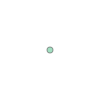

In [45]:
Point(req.latlng)

In [46]:
req.latlng

[46.5218269, 6.6327025]

In [62]:
req.latlng??

Nous avons parlé API auparavent. 
Ici `latlong` est probablement une API qui aurait plus être mieux pensée:

  - L'appeler `longlat`, vu que la longitude est en premier. 
  - Utiliser un `namedtuple` (ou une `dataclass` si vraiment récent en Pyton)
      - On pourrait utiliser `.long`, `.lat` qui est moins ambigue que 0,1
      - immutable, pas de risque de modifier les coordonnées par erreur.

In [66]:
from collections import namedtuple
LngLat = namedtuple('LongLat', ['long','lat'])
l = LngLat(*req.latlng)
l[0], l[1], l.long, l.lat

(46.5218269, 6.6327025, 46.5218269, 6.6327025)

(1.6327024999999997, 11.6327025, 41.5218269, 51.5218269)

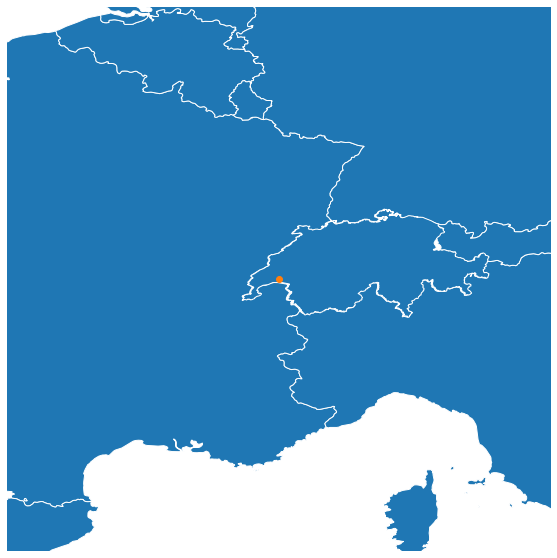

In [82]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
europe_mod.plot(ax=ax, linewidth=1, edgecolor='white', color='C0')
long, lat = req.latlng
ax.plot(lat, long, color='C1', marker="o")
ax.set_xlim(lat-5,lat+5)
ax.set_ylim(long-5,long+5)
ax.axis(False)

## Routiniser notre script

Faire une fonction qui prend en entrée une coordonnée GPS et donne le pays associé et des informations issues de wikipédia

On peut utiliser la fonction contains de Geopandas qui permet de savoir si un élément est contenu

In [48]:
p = Point(req.latlng[1],req.latlng[0])
europe_mod.contains(p)

name
Cyprus            False
France            False
Estonia           False
Denmark           False
Finland           False
Slovenia          False
Hungary           False
Bulgaria          False
Malta             False
Belgium           False
Czech Rep.        False
Netherlands       False
Greece            False
Slovakia          False
Ireland           False
Romania           False
Latvia            False
Poland            False
Italy             False
Germany           False
Spain             False
United Kingdom    False
Lithuania         False
Croatia           False
Sweden            False
Portugal          False
Luxembourg        False
Austria           False
Suisse             True
dtype: bool

## Outil en ligne de commande. 

Il se peut que vous ayez à faire ce traitement un grand nombre de fois, il peut être pénible de démarrer un notebook à chaque fois. 

Avoir les fonctions ci-dessus vont être très utiles. Nous allons rapidement voir comment faire un script que l'on peut utiliser en ligne de commande. 

Tant que nous y sommes nous allons utiliser les mêmes fonctions pour développer un serveur web. Cela vous donnera une idée de l'intérêt d'utiliser Python comme liant entre différentes briques d'informatique

Placer le code suivant dans un fichier `.py`:

```python

# sys sera utilisé pour accéder aux paramètres en ligne de commande
import sys
import io

import geocoder
import matplotlib
# Instructions spéciales quand on affiche pas
# les image directement à faire _avant_ 
# tout autre import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
import argparse
import wptools 

from functools import lru_cache
import flask
from flask import Flask, Response
app = Flask(__name__)



import geopandas as gpd
europe_file = "../Formation-Unil/Data/europe/european-union-countries.shp"
europe = gpd.read_file(europe_file)
suisse_file = "../Formation-Unil/Data/suisse/CHE_adm1.shp"
suisse = gpd.read_file(suisse_file)
suisse_p = suisse.dissolve(by="NAME_0",aggfunc='first')
europe_mod = europe[["name","geometry"]].set_index("name")
europe_mod = europe_mod.append(suisse_p[europe_mod.columns])


@lru_cache   # si location et radius ne changent pas met les résultats en cache.
def _fig(location, radius):
    req = geocoder.osm(location)
    fig,ax = plt.subplots(figsize=(10,10))
    europe_mod.plot(ax=ax, linewidth=1, edgecolor='white', color='C0')
    long, lat = req.latlng
    ax.plot(lat, long, color='C1', marker="o")
    ax.set_xlim(lat-radius,lat+radius)
    ax.set_ylim(long-radius,long+radius)
    ax.axis(False)
    infobox = wptools.page(location).get_parse().data['infobox']
    elevation = infobox.get('elevation', None)
    area = infobox.get('area')
    ax.set_title(f'Carte de {location} | {elevation}m | {area}$km^2$')

    nom_de_fichier = f"{location}.png"
    return fig


def main(location, radius):
    fig = _fig(location, radius)
    fig.savefig(f"{location}.png")
    print(f"saved as {nom_de_fichier}")

    
# serveur web.
@app.route('/<path:location>.png')
def handle(location):
    radius = 5
    buf = io.BytesIO()
    fig = _fig(location, radius)
    fig.savefig(buf, format='png')
    buf.seek(0)
    return Response(buf.read(), mimetype='image/png', headers={"Content-Disposition": "inline"})


# Quand on fait `python <fichier>.py` ce bloc va être exécuté. 
# Pas si on fait `import <fichier>`.
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Save a PNG file of given location')
    parser.add_argument('location', metavar='loc', type=str, nargs=1,
                    help='where')
    parser.add_argument('--radius', dest='radius',
                    type=int, default=5,
                    help='Radius around location to draw')
    parser.add_argument('--server', dest='server', action='store_true',
                    help='Start a falsk server')


    args = parser.parse_args()
    if args.server:
        app.run()
    else:
        print(args.location)
        print(args.radius)
        main(args.location[0], args.radius)
```

Essayons:

```
$ python <fichier>.py --help
$ python <fichier>.py zurich
$ python <fichier>.py ...
```

Regardons:
```
$ python <fichier>.py ... --server
```